# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.util import trigrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import LabelEncoder

# Read Data

In [2]:
fake_data = pd.read_csv(r"E:\NLP\news _dataset\Fake.csv")
true_data = pd.read_csv(r"E:\NLP\news _dataset\True.csv")

In [3]:
fake_data.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
fake_data['label'] = 1
true_data['label'] = 0

In [5]:
df = pd.concat([fake_data, true_data], axis=0).reset_index(drop=True)


In [6]:
df.isnull().sum()


title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [7]:
df = df[['title', 'text', 'label']]
df.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1


In [8]:
df['combined_text'] = df['title'] + " " + df['text']
df.head()

,title,text,label,combined_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,Pope Francis Just Called Out Donald Trump Dur...


# Preprocessing

In [9]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seabd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def preprocess_text(text):
    
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    
    trigrams = list(nltk.trigrams(tokens))
    
    return ' '.join([' '.join(trigram) for trigram in trigrams])

In [11]:
df['processed_text']=df['combined_text'].apply(preprocess_text)
processed_df = df[['processed_text', 'label']]
processed_df.head()

,processed_text,label
0,donald trump sends trump sends embarrassing se...,1
1,drunk bragging trump bragging trump staffer tr...,1
2,sheriff david clarke david clarke becomes clar...,1
3,trump obsessed even obsessed even obama even o...,1
4,pope francis called francis called donald call...,1


In [12]:
X = df['processed_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Training

In [14]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='linear')
}

In [15]:
model_accuracies = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))


Training Naive Bayes...
Naive Bayes Accuracy: 0.9261
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4247
           1       0.92      0.94      0.93      4733

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980


Training Logistic Regression...
Logistic Regression Accuracy: 0.9866
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4247
           1       0.99      0.99      0.99      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Training Random Forest...
Random Forest Accuracy: 0.9981
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4247
           1       1.00      1.00      1.00      4733



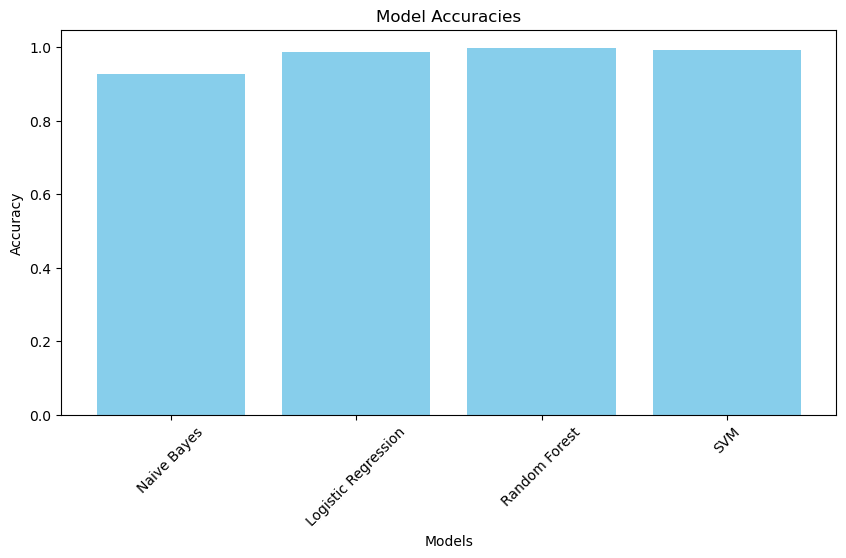

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.xticks(rotation=45)
plt.show()


Training Voting Classifier...
Voting Classifier Accuracy: 0.9909
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4247
           1       0.99      0.99      0.99      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



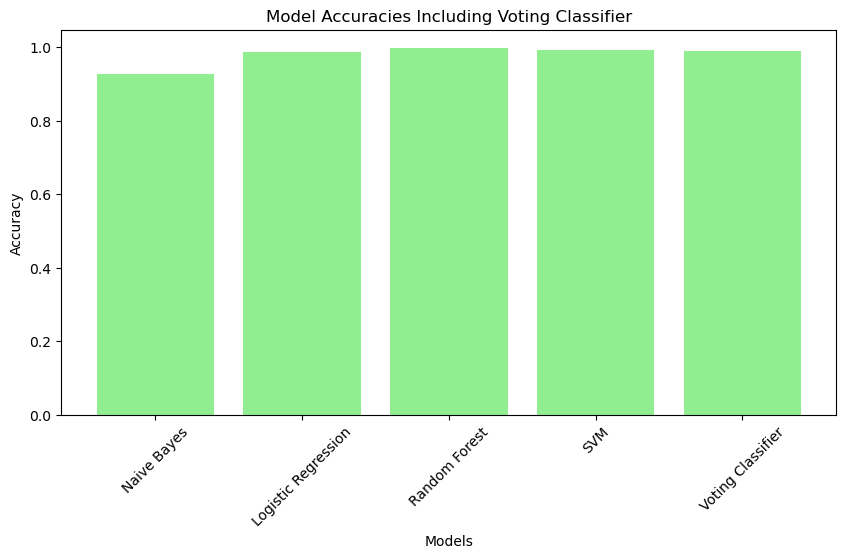

In [17]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ("Logistic Regression", models["Logistic Regression"]),
        ("Naive Bayes", models["Naive Bayes"]),
        ("SVM", models["SVM"]),
        ("Random Forest", models["Random Forest"]),
    ],
    voting="hard"
)

print("\nTraining Voting Classifier...")
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_pred)

model_accuracies["Voting Classifier"] = voting_accuracy
print(f"Voting Classifier Accuracy: {voting_accuracy:.4f}")
print(classification_report(y_test, voting_pred))

plt.figure(figsize=(10, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='lightgreen')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracies Including Voting Classifier")
plt.xticks(rotation=45)
plt.show()